In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [172]:
class libsObject():
    def __init__(self, coordinates: np.array):
        self.coordinates = np.expand_dims(coordinates, axis=0)

    def print_object(self, coordinates: np.array, title: str) -> None:
        x = coordinates[:, 0]
        y = coordinates[:, 1]
        plt.figure(figsize=(6, 6))
        plt.plot(x, y, marker='o')
        plt.fill(x, y, alpha=0.3, color='orange')
        plt.gca().set_aspect('equal', adjustable='box')
        plt.grid(True)
        plt.title(title)
        plt.show()
    def get_center_of_bounding_box(self):
        min_x = np.min(self.coordinates[:, 0])
        max_x = np.max(self.coordinates[:, 0])
        min_y = np.min(self.coordinates[:, 1])
        max_y = np.max(self.coordinates[:, 1])
        center_x = (min_x + max_x) / 2
        center_y = (min_y + max_y) / 2
        return (center_x, center_y)

    
    def rotation(self, angle: float):
        cx, cy = self.get_center_of_bounding_box()
        rotation_matrix = cv2.getRotationMatrix2D((cx, cy), angle, 1.0)
        new_coordinates = cv2.transform(self.coordinates, rotation_matrix)[0]
        self.print_object(new_coordinates, 'Rotation')
        return new_coordinates
    
    def scale(self, factor: float):
        scaling_matrix = np.array([[factor, 0, 0],[0, factor, 0]])
        new_coordinates = cv2.transform(self.coordinates, scaling_matrix)[0]
        self.print_object(new_coordinates, "scaling")
        return new_coordinates
    
    def reflection(self, axis: str):
        reflection_matrix = np.eye(2)
        if axis == 'x':
            reflection_matrix[1][1] = -1
        elif axis == 'y':
            reflection_matrix[0][0] = -1
        elif axis == '0':
            reflection_matrix = reflection_matrix * -1
        else:
            raise ValueError("incorrect axis")

        new_coordinates = cv2.transform(self.coordinates, reflection_matrix)[0]
        self.print_object(new_coordinates, f'Reflection about {axis}-axis')
        return new_coordinates
    
    def shear(self, axis:str, angle:float):
        angle = np.radians(angle)
        shear_matrix = np.eye(3)
        if axis == 'x':
            shear_matrix[0][1] = 1 * np.tan(angle)
        elif axis == 'y':
            shear_matrix[1][0] = 1 * np.tan(angle)
        else:
            raise ValueError("incorrect axis")
        
        new_coordinates = cv2.transform(self.coordinates,shear_matrix)[0]
        self.print_object(new_coordinates, "shear")
        return new_coordinates
    
    def custom_transform(self, matrix):
        matrix = np.array(matrix)
        if matrix.shape == (2,2):
            new_coordinates = cv2.transform(self.coordinates, matrix)[0]
            self.print_object(new_coordinates, "custom_transform")
            return new_coordinates
        else:
            print("invalid matrix")
            return -1
    
    def __str__(self):
        print(self.coordinates.shape)
        print(self.coordinates[0])
        self.print_object(self.coordinates[0], 'origin matrix')
        return ""

(1, 14, 2)
[[ 0.   5. ]
 [ 2.   7. ]
 [ 4.   7.5]
 [ 5.   7. ]
 [ 6.   5. ]
 [ 8.   4. ]
 [12.   5. ]
 [ 9.   0. ]
 [ 7.5  2. ]
 [ 6.   0. ]
 [ 4.5  2. ]
 [ 3.   0. ]
 [ 3.   4. ]
 [ 2.   5. ]]


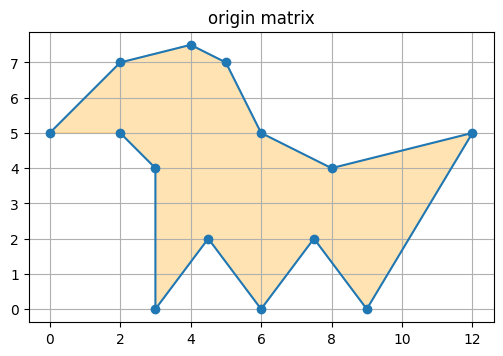


(1, 12, 2)
[[ 5.  11. ]
 [ 4.   9. ]
 [ 4.5  9. ]
 [ 3.   7. ]
 [ 4.5  7. ]
 [ 2.   5. ]
 [ 8.   5. ]
 [ 5.5  7. ]
 [ 7.   7. ]
 [ 5.5  9. ]
 [ 6.   9. ]
 [ 5.  11. ]]


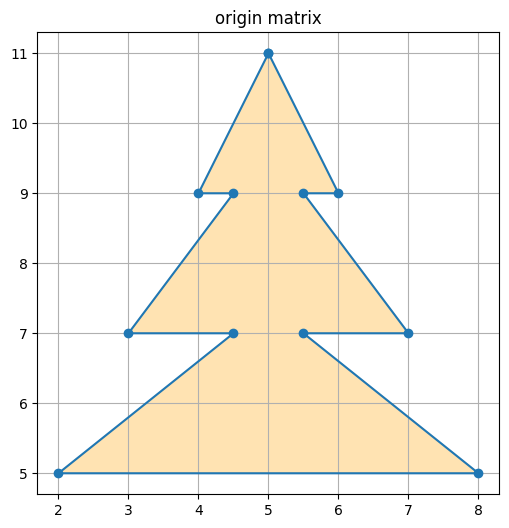

In [173]:

points = np.array(
    [[0, 5], [2, 7], [4, 7.5], [5, 7], [6, 5], [8, 4], [12, 5], [9, 0], [7.5, 2], [6, 0], [4.5, 2], [3, 0], [3, 4],
     [2, 5]])
dino = libsObject(points)
print(dino)

tree_points = np.array([
    (5, 11), (4, 9), (4.5, 9), (3, 7), (4.5, 7), (2, 5), (8, 5), (5.5, 7), (7, 7), (5.5, 9), (6, 9), (5, 11)])
tree = libsObject(tree_points)
print(tree)


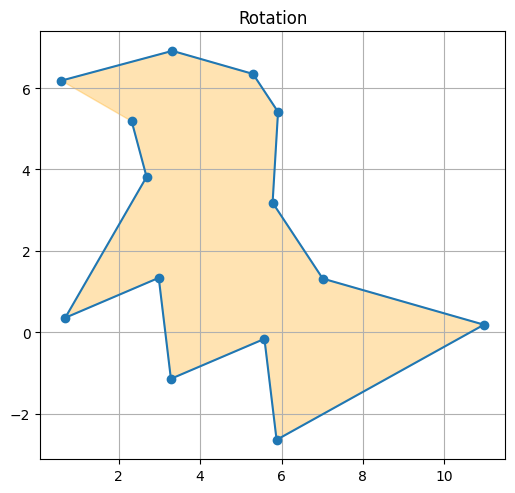

[[ 0.58493649  6.1830127 ]
 [ 3.3169873   6.91506351]
 [ 5.29903811  6.34807621]
 [ 5.91506351  5.41506351]
 [ 5.78108891  3.1830127 ]
 [ 7.01313972  1.3169873 ]
 [10.97724134  0.1830127 ]
 [ 5.87916512 -2.64711432]
 [ 5.58012702 -0.16506351]
 [ 3.28108891 -1.14711432]
 [ 2.98205081  1.33493649]
 [ 0.6830127   0.35288568]
 [ 2.6830127   3.8169873 ]
 [ 2.3169873   5.1830127 ]]


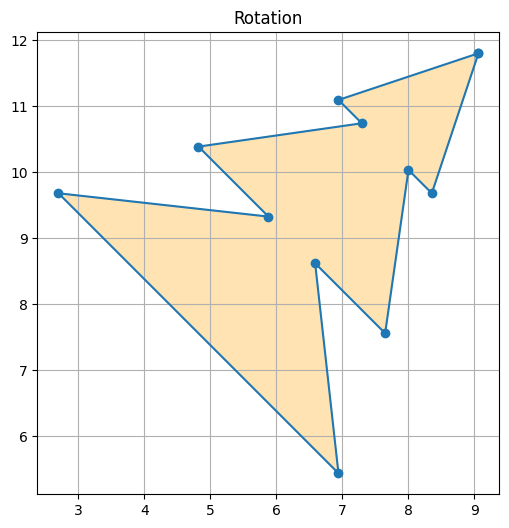

[[ 9.06066017 11.80330086]
 [ 6.93933983 11.09619408]
 [ 7.29289322 10.74264069]
 [ 4.81801948 10.3890873 ]
 [ 5.87867966  9.32842712]
 [ 2.69669914  9.68198052]
 [ 6.93933983  5.43933983]
 [ 6.58578644  8.62132034]
 [ 7.64644661  7.56066017]
 [ 8.         10.03553391]
 [ 8.35355339  9.68198052]
 [ 9.06066017 11.80330086]]


In [161]:
#rotation
print(dino.rotation(30))
print(tree.rotation(45))

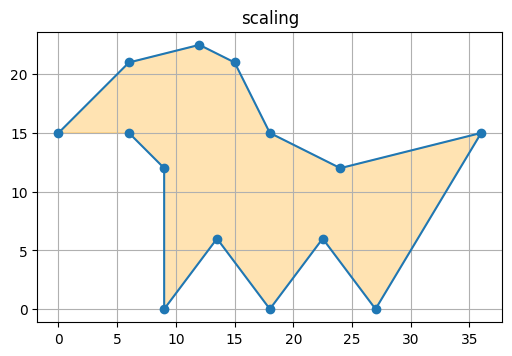

[[ 0.  15. ]
 [ 6.  21. ]
 [12.  22.5]
 [15.  21. ]
 [18.  15. ]
 [24.  12. ]
 [36.  15. ]
 [27.   0. ]
 [22.5  6. ]
 [18.   0. ]
 [13.5  6. ]
 [ 9.   0. ]
 [ 9.  12. ]
 [ 6.  15. ]]


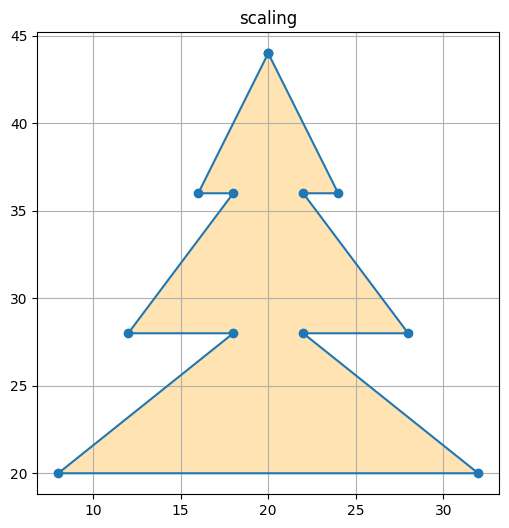

[[20. 44.]
 [16. 36.]
 [18. 36.]
 [12. 28.]
 [18. 28.]
 [ 8. 20.]
 [32. 20.]
 [22. 28.]
 [28. 28.]
 [22. 36.]
 [24. 36.]
 [20. 44.]]


In [162]:
# scaling 
print(dino.scale(3))
print(tree.scale(4))

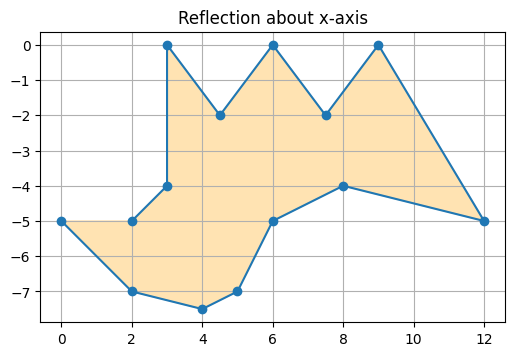

[[ 0.  -5. ]
 [ 2.  -7. ]
 [ 4.  -7.5]
 [ 5.  -7. ]
 [ 6.  -5. ]
 [ 8.  -4. ]
 [12.  -5. ]
 [ 9.   0. ]
 [ 7.5 -2. ]
 [ 6.   0. ]
 [ 4.5 -2. ]
 [ 3.   0. ]
 [ 3.  -4. ]
 [ 2.  -5. ]]


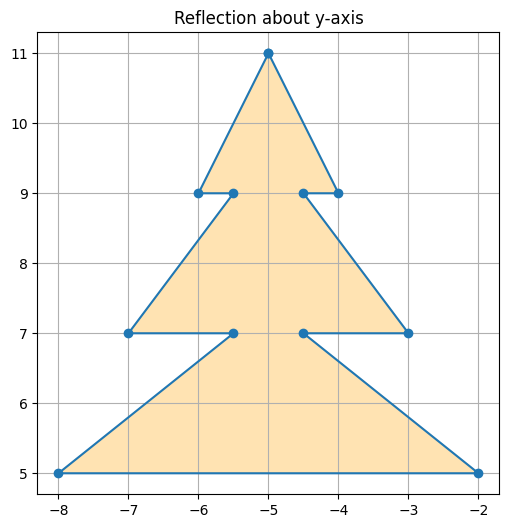

[[-5.  11. ]
 [-4.   9. ]
 [-4.5  9. ]
 [-3.   7. ]
 [-4.5  7. ]
 [-2.   5. ]
 [-8.   5. ]
 [-5.5  7. ]
 [-7.   7. ]
 [-5.5  9. ]
 [-6.   9. ]
 [-5.  11. ]]


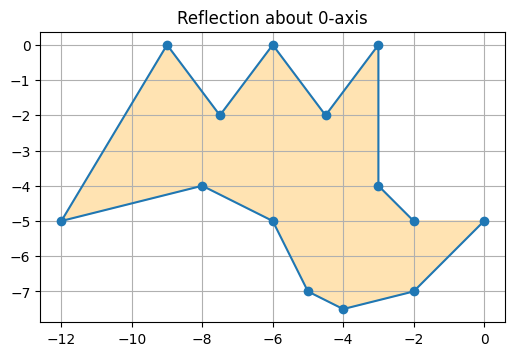

[[  0.   -5. ]
 [ -2.   -7. ]
 [ -4.   -7.5]
 [ -5.   -7. ]
 [ -6.   -5. ]
 [ -8.   -4. ]
 [-12.   -5. ]
 [ -9.    0. ]
 [ -7.5  -2. ]
 [ -6.    0. ]
 [ -4.5  -2. ]
 [ -3.    0. ]
 [ -3.   -4. ]
 [ -2.   -5. ]]


In [163]:
# reflection
print(dino.reflection("x"))
print(tree.reflection("y"))
print(dino.reflection("0"))

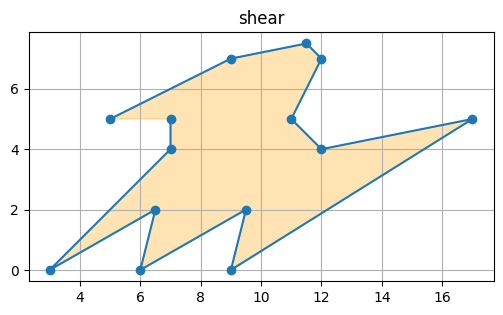

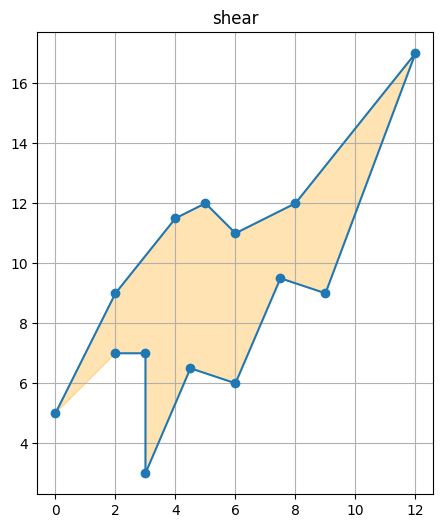

array([[ 0. ,  5. ,  1. ],
       [ 2. ,  9. ,  1. ],
       [ 4. , 11.5,  1. ],
       [ 5. , 12. ,  1. ],
       [ 6. , 11. ,  1. ],
       [ 8. , 12. ,  1. ],
       [12. , 17. ,  1. ],
       [ 9. ,  9. ,  1. ],
       [ 7.5,  9.5,  1. ],
       [ 6. ,  6. ,  1. ],
       [ 4.5,  6.5,  1. ],
       [ 3. ,  3. ,  1. ],
       [ 3. ,  7. ,  1. ],
       [ 2. ,  7. ,  1. ]])

In [174]:
#shearing
dino.shear("x", 45)
dino.shear("y", 45)

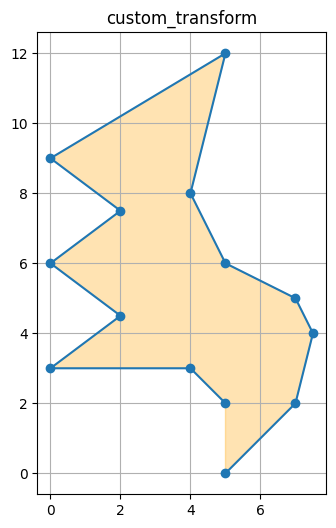

[[ 5.   0. ]
 [ 7.   2. ]
 [ 7.5  4. ]
 [ 7.   5. ]
 [ 5.   6. ]
 [ 4.   8. ]
 [ 5.  12. ]
 [ 0.   9. ]
 [ 2.   7.5]
 [ 0.   6. ]
 [ 2.   4.5]
 [ 0.   3. ]
 [ 4.   3. ]
 [ 5.   2. ]]


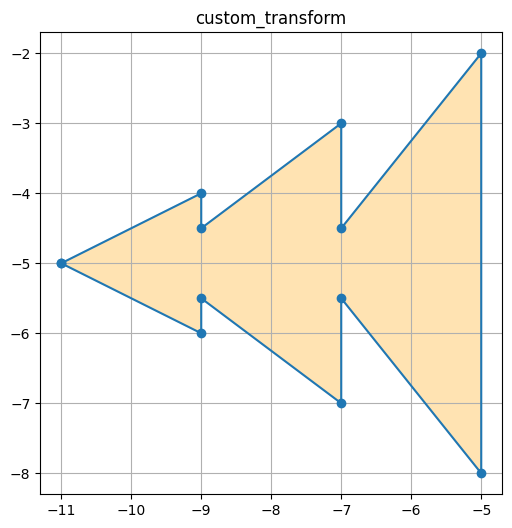

[[-11.   -5. ]
 [ -9.   -4. ]
 [ -9.   -4.5]
 [ -7.   -3. ]
 [ -7.   -4.5]
 [ -5.   -2. ]
 [ -5.   -8. ]
 [ -7.   -5.5]
 [ -7.   -7. ]
 [ -9.   -5.5]
 [ -9.   -6. ]
 [-11.   -5. ]]


In [175]:

# custom transformation
print(dino.custom_transform([[0, 1], [1, 0]]))
print(tree.custom_transform([[0, -1], [-1, 0]]))